In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\AugustoTelesdaCostae\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot



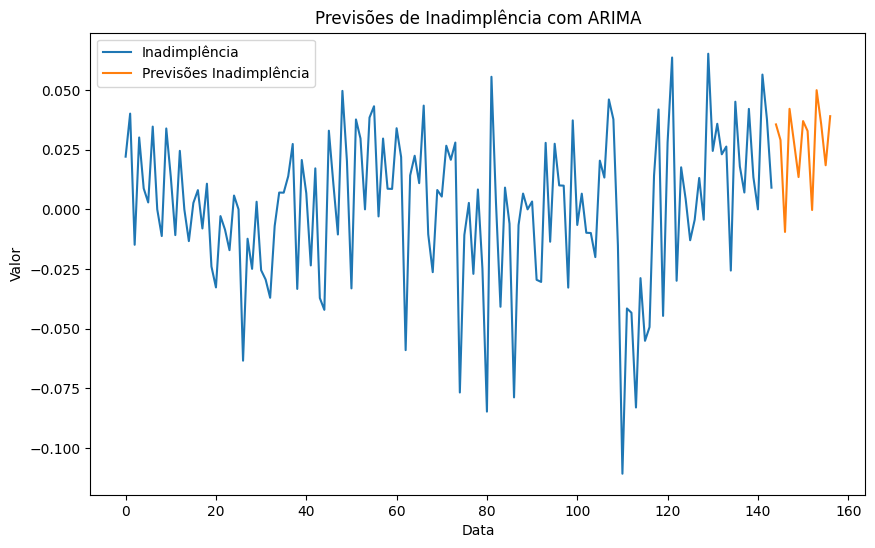

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

#arquivo em excel
df = pd.read_excel('database_bcb.xlsx')

# nomear as colunas
inadimplencia = df['inadimplencia']

# inputs ARIMA
p = 8  # AR
d = 2  # diferenciação
q = 12  # MA
n = 12  # períodos

modelo_inadimplencia = ARIMA(inadimplencia, order=(p, d, q))
modelo_inadimplencia_treinado = modelo_inadimplencia.fit()
previsoes_inadimplencia = modelo_inadimplencia_treinado.predict(start=len(inadimplencia), end=len(inadimplencia) + n)

#gráfico1
plt.figure(figsize=(10, 6))
plt.plot(inadimplencia.index, inadimplencia, label='Inadimplência')
plt.plot(previsoes_inadimplencia.index, previsoes_inadimplencia, label='Previsões Inadimplência')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Previsões de Inadimplência com ARIMA')
plt.legend()
plt.show()

(3, 2)
(3, 2)


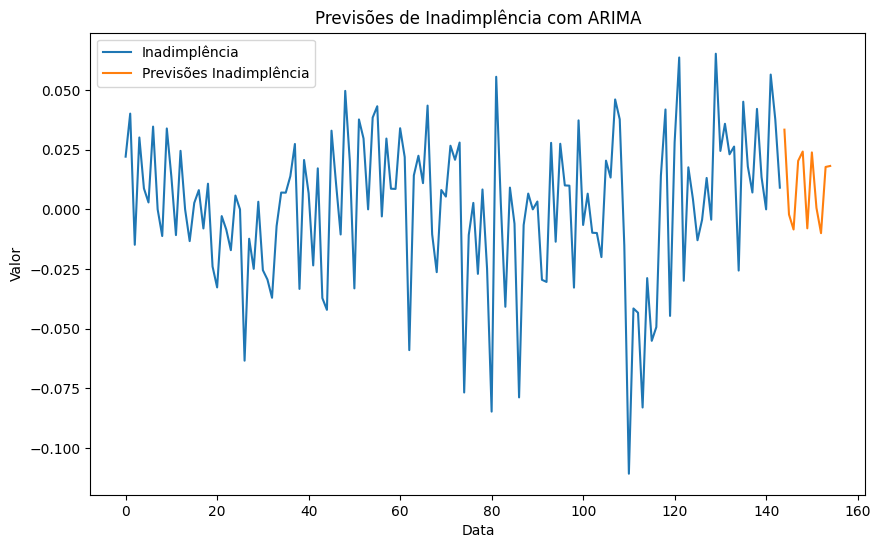

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_excel('database_bcb.xlsx')

inadimplencia = df['inadimplencia']

order_aic_inadimplencia = arma_order_select_ic(df["inadimplencia"], ic="aic")["aic_min_order"]
order_bic_inadimplencia = arma_order_select_ic(df["inadimplencia"], ic="bic")["bic_min_order"]
print(order_aic_inadimplencia)
print(order_bic_inadimplencia)

#ARIMA 
p = 8  
d = 0
q = 12 
n = 10  

modelo_arima_inadimplencia = ARIMA(inadimplencia, order=(p, d, q))
modelo_arima_inadimplencia_treinado = modelo_arima_inadimplencia.fit()

previsoes_arima_inadimplencia = modelo_arima_inadimplencia_treinado.predict(start=len(inadimplencia),
                                                                           end=len(inadimplencia) + n)

plt.figure(figsize=(10, 6))
plt.plot(inadimplencia.index, inadimplencia, label='Inadimplência')
plt.plot(previsoes_arima_inadimplencia.index, previsoes_arima_inadimplencia, label='Previsões Inadimplência')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Previsões de Inadimplência com ARIMA')
plt.legend()
plt.show()


(2, 2)


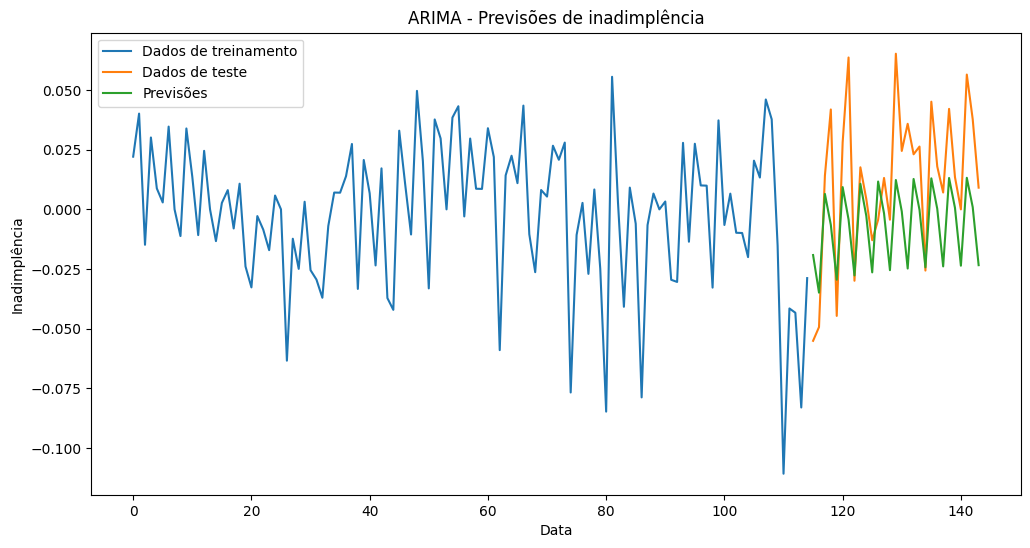

(2, 2)

In [61]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Dividir a base de dados em treinamento e teste (80% treinamento, 20% teste)
train_size = 0.8
train_data, test_data = train_test_split(df, train_size=train_size, shuffle=False)

# Ajustar o modelo ARIMA para a coluna "inadimplencia"
order_aic_inadimplencia = arma_order_select_ic(train_data["inadimplencia"], ic="aic")["aic_min_order"]
print(order_aic_inadimplencia)
model_inadimplencia = ARIMA(train_data["inadimplencia"], order=((4,0,3)))
model_inadimplencia_fit = model_inadimplencia.fit()

# Obter as previsões do modelo ARIMA
predictions = model_inadimplencia_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Plotar os dados reais e as previsões
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data["inadimplencia"], label="Dados de treinamento")
plt.plot(test_data.index, test_data["inadimplencia"], label="Dados de teste")
plt.plot(predictions.index, predictions, label="Previsões")
plt.title("ARIMA - Previsões de inadimplência")
plt.xlabel("Data")
plt.ylabel("Inadimplência")
plt.legend()
plt.show()
order_aic_inadimplencia

Estatística ADF: -3.5623005092653868
Valor p: 0.0065240372287151925
Valores críticos:
	 1% : -3.4808880719210005
	 5% : -2.8836966192225284
	 10% : -2.5785857598714417


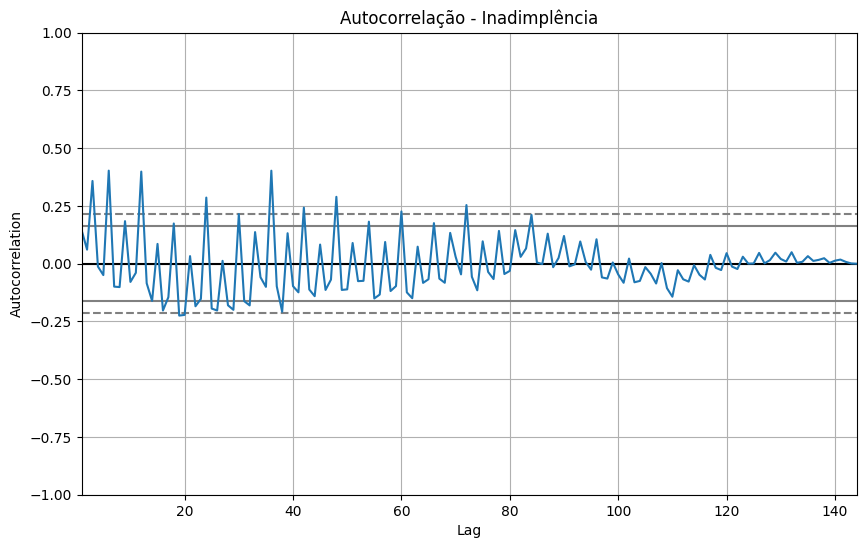

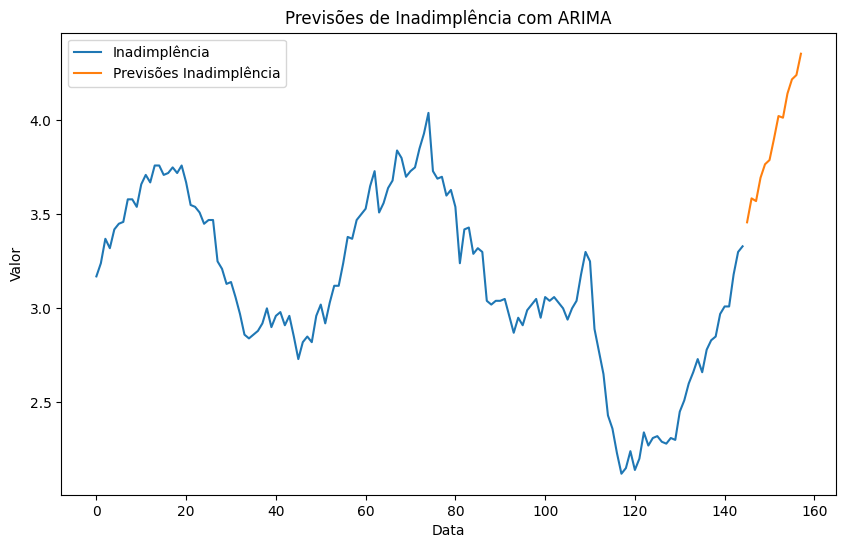

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

data = pd.read_excel('database_bcb.xlsx')

# teste ADF
def adf_test(series):
    result = adfuller(series)
    print('Estatística ADF:', result[0])
    print('Valor p:', result[1])
    print('Valores críticos:')
    for key, value in result[4].items():
        print('\t', key, ':', value)


adf_test(data['inadimplencia'])
plt.figure(figsize=(10, 6))
pd.plotting.autocorrelation_plot(df["inadimplencia"]) #plot de autocorrelação
plt.title("Autocorrelação - Inadimplência")
plt.show()
##vou ter que remover a base de spread médio pois o Valor p deu acima de 0,05, a hipótese nula foi aceita.

#ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Puxar o arquivo em excel
df = pd.read_excel('database_bcb.xlsx')

# nomear as colunas
inadimplencia = df['inadimplencia']

# inputs ARIMA
p = 8  # AR
d = 2  # diferenciação
q = 12  # MA
n = 12  # períodos

modelo_inadimplencia = ARIMA(inadimplencia, order=(p, d, q))
modelo_inadimplencia_treinado = modelo_inadimplencia.fit()
previsoes_inadimplencia = modelo_inadimplencia_treinado.predict(start=len(inadimplencia), end=len(inadimplencia) + n)

#gráfico1
plt.figure(figsize=(10, 6))
plt.plot(inadimplencia.index, inadimplencia, label='Inadimplência')
plt.plot(previsoes_inadimplencia.index, previsoes_inadimplencia, label='Previsões Inadimplência')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Previsões de Inadimplência com ARIMA')
plt.legend()
plt.show()


Erro médio quadrado): 0.19128872536642344


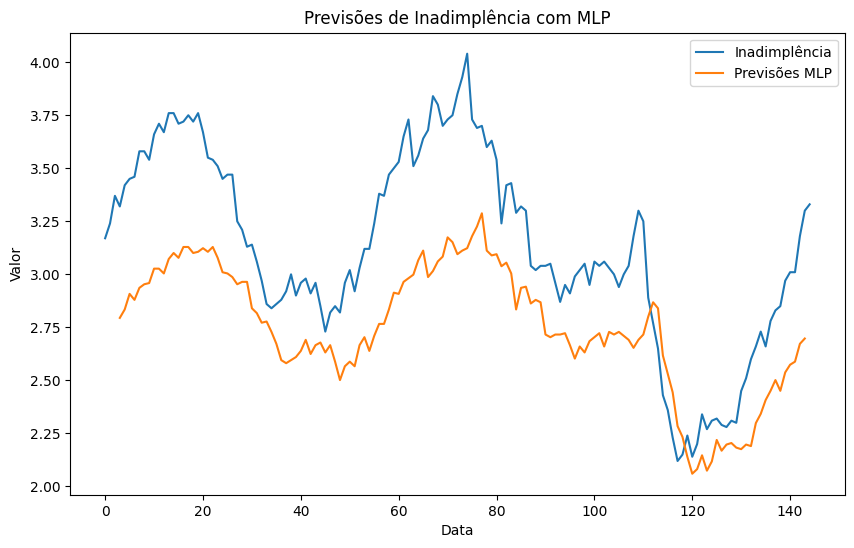

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_excel('database_bcb.xlsx')
inadimplencia = df['inadimplencia']

p = 3
n = 1

#não precisei normalizar para realizar o MPL pois os dados já estão em escala de porcentagem
X_treino = inadimplencia[:-n-p].values.reshape(-1, 1)
y_treino = inadimplencia[p:-n].values

#modelo MLP
modelo_mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', random_state=(5))
modelo_mlp.fit(X_treino, y_treino)

#previsões
previsoes_mlp = modelo_mlp.predict(X_treino)

#MSE - erro médio quadrado
mse = mean_squared_error(y_treino, previsoes_mlp)
print('Erro médio quadrado):', mse)

#grafico
plt.figure(figsize=(10, 6))
plt.plot(inadimplencia.index, inadimplencia, label='Inadimplência')
plt.plot(inadimplencia[p:-n].index, previsoes_mlp, label='Previsões MLP')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Previsões de Inadimplência com MLP')
plt.legend()
plt.show()


Erro médio quadrado: 0.043299619797833935


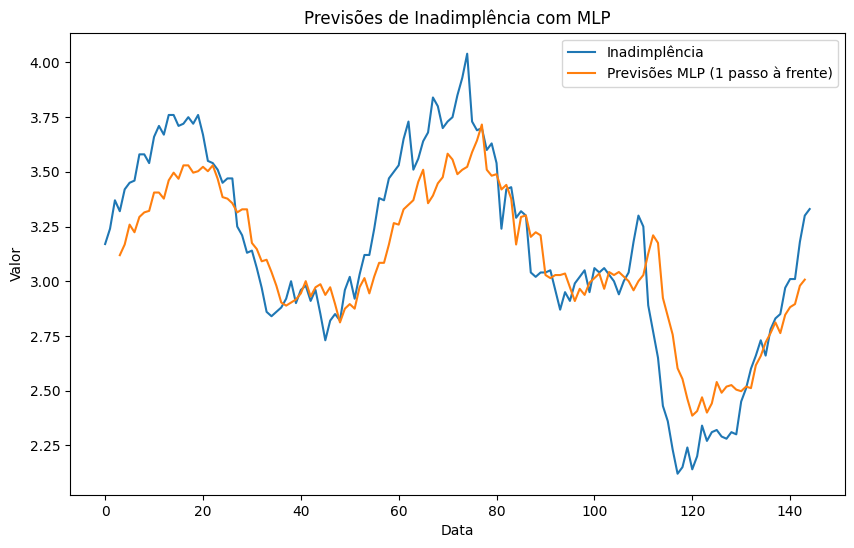

In [119]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Puxar o arquivo em excel
df = pd.read_excel('database_bcb.xlsx')

# nomear as colunas
inadimplencia = df['inadimplencia']
p = 3
n = 1

# Carregar os dados e definir as variáveis de treinamento
X_treino = inadimplencia[:-n-p].values.reshape(-1, 1)
y_treino = inadimplencia[p:-n].values

# Modelo MLP
modelo_mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', random_state=42)
modelo_mlp.fit(X_treino, y_treino)

# Previsões
previsoes_mlp = modelo_mlp.predict(X_treino)

# MSE - erro médio quadrado
mse = mean_squared_error(y_treino, previsoes_mlp)
print('Erro médio quadrado:', mse)

# Número de passos à frente
n_passos = 1

# Lista para armazenar as previsões de mais passos à frente
previsoes_mais_passos = []

# Últimos valores de entrada para previsão
x = X_treino[-p:].reshape(-1, p)

for _ in range(n_passos):
    # Realizar a previsão para o próximo passo
    previsao = modelo_mlp.predict(X_treino[-1].reshape(1, -1))
    previsoes_mais_passos.append(previsao[0])
    
    # Atualizar os valores de entrada para incluir a nova previsão
    x = np.vstack((X_treino, previsao.reshape(-1, 1)))

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(inadimplencia.index, inadimplencia, label='Inadimplência')
plt.plot(inadimplencia[p:-n].index, previsoes_mlp, label='Previsões MLP (1 passo à frente)')


plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Previsões de Inadimplência com MLP')
plt.legend()
plt.show()

Erro médio quadrado: 0.04354616688504849


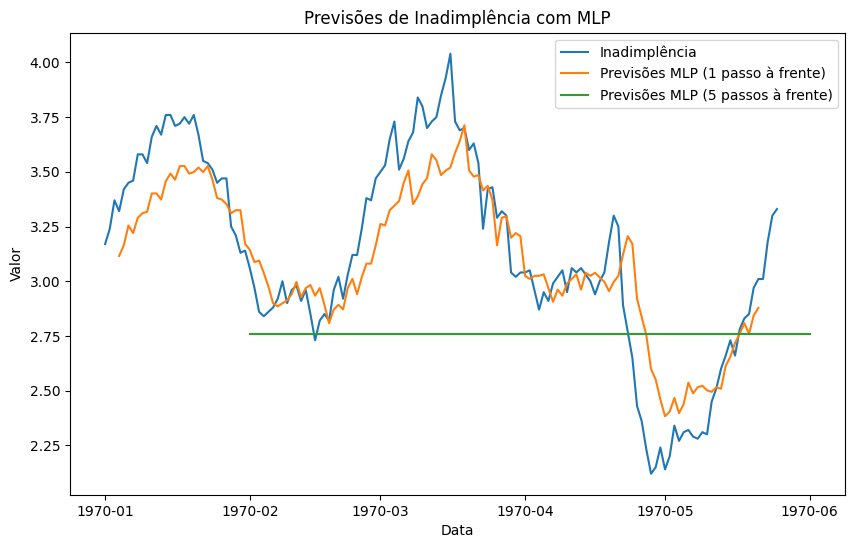

In [319]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Puxar o arquivo em excel
df = pd.read_excel('database_bcb.xlsx')

# nomear as colunas
inadimplencia = df['inadimplencia']
p = 3
n = 4

# Carregar os dados e definir as variáveis de treinamento
X_treino = inadimplencia[:-n-p].values.reshape(-1, 1)
y_treino = inadimplencia[p:-n].values

# Modelo MLP
modelo_mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', random_state=42)
modelo_mlp.fit(X_treino, y_treino)

# Previsões
previsoes_mlp = modelo_mlp.predict(X_treino)

# MSE - erro médio quadrado
mse = mean_squared_error(y_treino, previsoes_mlp)
print('Erro médio quadrado:', mse)

# Número de passos à frente
n_passos = 5

# Lista para armazenar as previsões de mais passos à frente
previsoes_mais_passos = []

# Últimos valores de entrada para previsão
x = X_treino[-p:].reshape(-1, 1)

for _ in range(n_passos):
    # Realizar a previsão para o próximo passo
    previsao = modelo_mlp.predict(x)
    previsoes_mais_passos.append(previsao[0])
    
    # Atualizar os valores de entrada para incluir a nova previsão
    x = np.vstack((x, previsao.reshape(-1, 1)))

# Índices de data para a previsão de múltiplos passos à frente
indices_previsao = pd.date_range(start=inadimplencia.index[-n-p], periods=n_passos+1, freq='MS')[1:]

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(inadimplencia.index, inadimplencia, label='Inadimplência')
plt.plot(inadimplencia[p:-n].index, previsoes_mlp, label='Previsões MLP (1 passo à frente)')
plt.plot(indices_previsao, previsoes_mais_passos, label='Previsões MLP ({} passos à frente)'.format(n_passos))

plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Previsões de Inadimplência com MLP')
plt.legend()
plt.show()

Erro médio quadrado: 0.043803678473854996


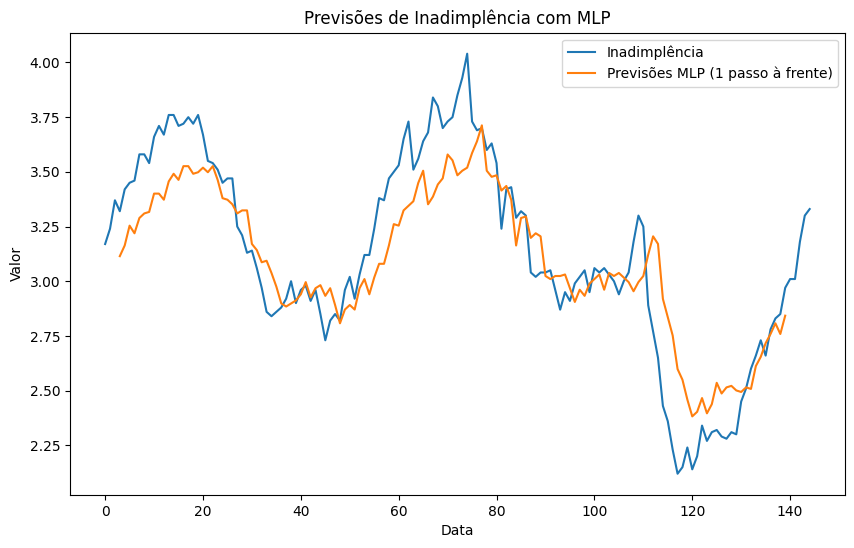

In [318]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Puxar o arquivo em excel
df = pd.read_excel('database_bcb.xlsx')

# Nomear as colunas
inadimplencia = df['inadimplencia']
p = 3
n = 5

# Carregar os dados e definir as variáveis de treinamento
X_treino = inadimplencia[:-n-p].values.reshape(-1, 1)
y_treino = inadimplencia[p:-n].values

# Modelo MLP
modelo_mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', random_state=42)
modelo_mlp.fit(X_treino, y_treino)

# Previsões
previsoes_mlp = modelo_mlp.predict(X_treino)

# MSE - erro médio quadrado
mse = mean_squared_error(y_treino, previsoes_mlp)
print('Erro médio quadrado:', mse)

n_passos = 1
previsoes_mais_passos = []

x = X_treino[-p:].reshape(-1, p)

for _ in range(n_passos):
    previsao = modelo_mlp.predict(X_treino)
    previsoes_mais_passos.append(previsao[0])
    x = np.vstack((X_treino, previsao.reshape(-1, 1)))

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(inadimplencia.index, inadimplencia, label='Inadimplência')
plt.plot(inadimplencia[p:-n].index, previsao, label='Previsões MLP (1 passo à frente)')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Previsões de Inadimplência com MLP')
plt.legend()
plt.show()

GRAFICO DE AUTOCORREL PRA DEFINIR OS PARAMETROS DO ARIMA

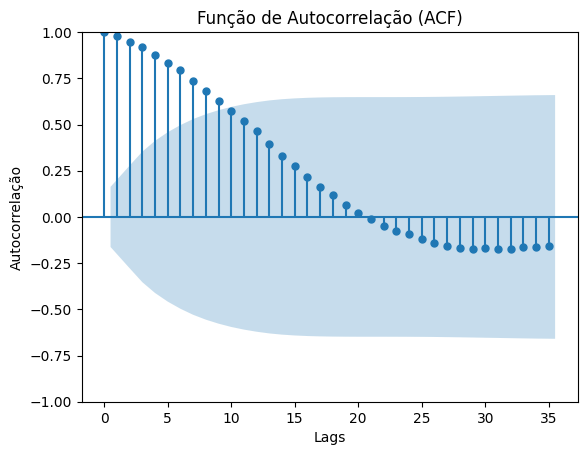

<Figure size 1800x600 with 0 Axes>

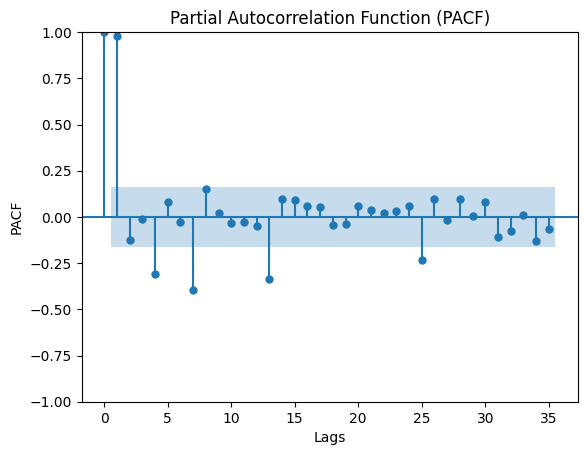

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = pd.read_excel('database_bcb.xlsx')

# calcular e plotar a função de autocorrelação
plot_acf(data['inadimplencia'], lags=35)
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.title('Função de Autocorrelação (ACF)')
plt.show()

plt.figure(figsize=(18, 6))
plot_pacf(df['inadimplencia'], lags=35, alpha=0.05)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

**ARIMA SOMENTE TESTE**


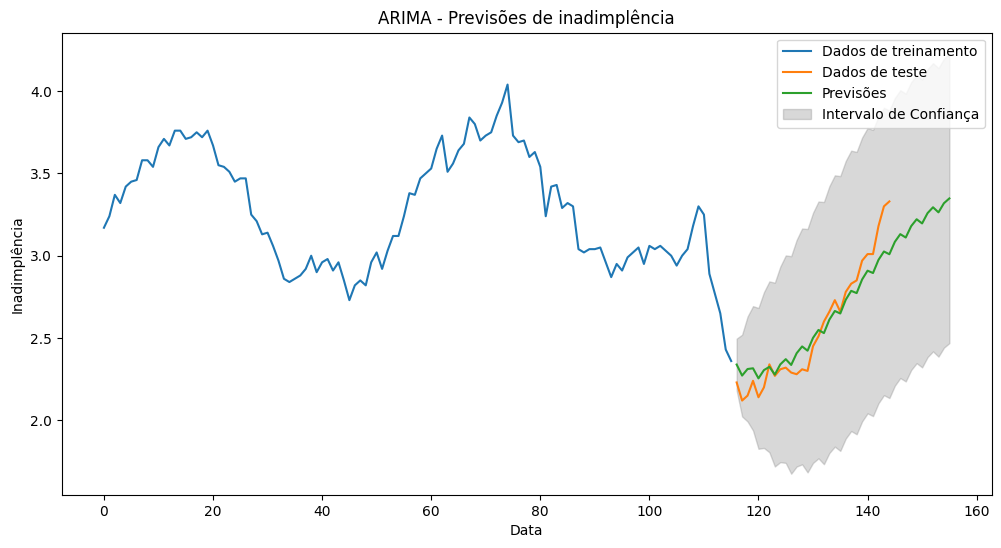

In [218]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# treinamento x teste (0.8, 0.2)
train_size = 0.80
train_data, test_data = train_test_split(df, train_size=train_size, shuffle=False)

# criar a ordem do p, q e d de acordo com a análise do PACF e do ACF
model_inadimplencia = ARIMA(train_data["inadimplencia"], order=(4, 0, 7))
model_inadimplencia_fit = model_inadimplencia.fit()

# Fazer a previsão de n passos à frente
n_passos = 40
forecast = model_inadimplencia_fit.get_forecast(steps=n_passos)

# Obter os valores previstos e os intervalos de confiança
predicted_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plotar os dados reais, as previsões e os intervalos de confiança
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data["inadimplencia"], label="Dados de treinamento")
plt.plot(test_data.index, test_data["inadimplencia"], label="Dados de teste")
plt.plot(predicted_values.index, predicted_values, label="Previsões")
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3, label='Intervalo de Confiança')
plt.title("ARIMA - Previsões de inadimplência")
plt.xlabel("Data")
plt.ylabel("Inadimplência")
plt.legend()
plt.show()

**ARIMA TESTE E PREVISÃO**

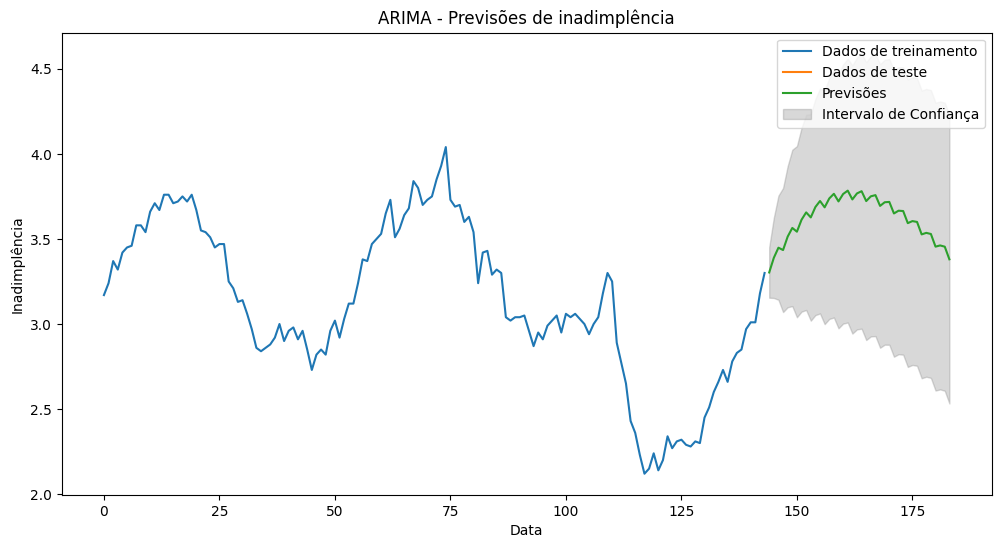

In [228]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

train_size = 0.9999 ##será input, unica forma que consegui criar o modelo para que fique somente os dados + previsões foi colocando "0.999999" aqui, caso queira visualizar como foi o comportamento da previsão com 80% de teste basta mudar esse valor para 0.8
train_data, test_data = train_test_split(df, train_size=train_size, shuffle=False)

#model
model_inadimplencia = ARIMA(train_data["inadimplencia"], order=(4, 0, 7))
model_inadimplencia_fit = model_inadimplencia.fit()
n_passos = 40
forecast = model_inadimplencia_fit.get_forecast(steps=n_passos)
predicted_values = forecast.predicted_mean
conf_int = forecast.conf_int()


predicted_values = predicted_values.dropna()
conf_int = conf_int.dropna()

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data["inadimplencia"], label="Dados de treinamento")
plt.plot(test_data.index, test_data["inadimplencia"], label="Dados de teste")
plt.plot(predicted_values.index, predicted_values, label="Previsões")
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3, label='Intervalo de Confiança')
plt.title("ARIMA - Previsões de inadimplência")
plt.xlabel("Data")
plt.ylabel("Inadimplência")
plt.legend()
plt.show()

**LSTM**

Epoch 1/50
9/9 [==============================] - 3s 4ms/step - loss: 0.3289
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 0.2774
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.2321
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 0.1944
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 0.1561
Epoch 6/50
9/9 [==============================] - 0s 5ms/step - loss: 0.1212
Epoch 7/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0955
Epoch 8/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0676
Epoch 9/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0484
Epoch 10/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0379
Epoch 11/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0283
Epoch 12/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0242
Epoch 13/50
9/9 [==============================] - 0s 7ms/step - loss: 0.

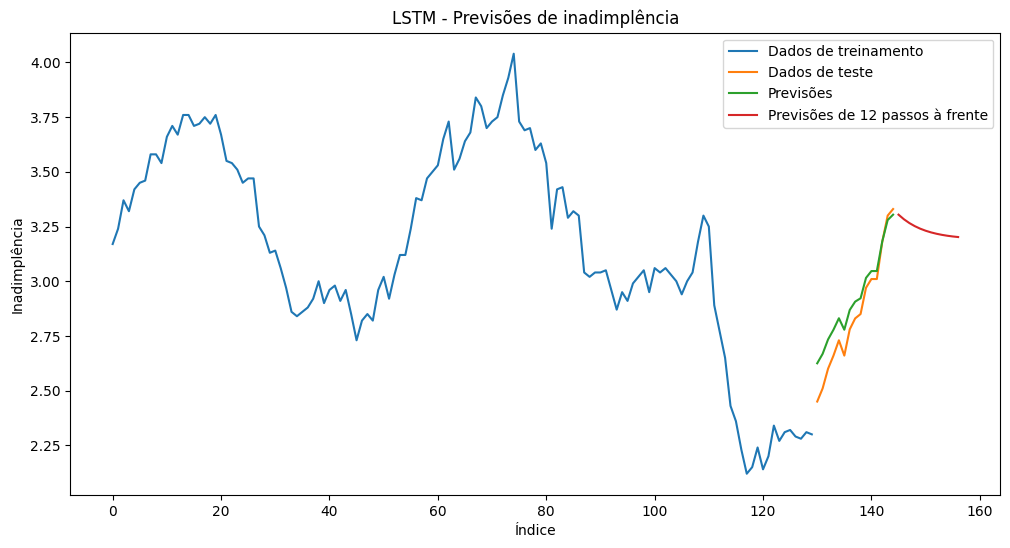

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

data = pd.read_excel('database_bcb.xlsx')
y = data['inadimplencia'].values

train_size = int(len(y) * 0.9)  # 90% treinamento
test_size = len(y) - train_size  # 10% teste
y_train, y_test = y[:train_size], y[train_size:]

scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

X_train = np.reshape(y_train_scaled[:-1], (y_train_scaled[:-1].shape[0], 1, 1))
X_test = np.reshape(y_test_scaled, (y_test_scaled.shape[0], 1, 1))

model = Sequential()
model.add(LSTM(64, input_shape=(1, 1)))
model.add(Dropout(0.2))  #para regularização
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

#inputs
epochs = 50 
batch_size = 16
model.fit(X_train, y_train_scaled[1:], epochs=epochs, batch_size=batch_size, verbose=1)

y_test_pred_scaled = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

n_passos = 12 # passos
x = np.array([[y_test_scaled[-1]]])

previsoes_mais_passos = []

for _ in range(n_passos):
    previsao_scaled = model.predict(np.reshape(x, (1, 1, 1)))
    previsao = scaler.inverse_transform(previsao_scaled)
    previsoes_mais_passos.append(previsao[0, 0])
    x = np.array([[previsao_scaled]])

previsoes_mais_passos = np.array(previsoes_mais_passos).reshape(-1, 1)

# config grafico
indices_train = range(len(y_train))
indices_test = range(len(y_train), len(y_train) + len(y_test))
indices_pred = range(len(y_train) + len(y_test), len(y_train) + len(y_test) + n_passos)

# plot grafico
plt.figure(figsize=(12, 6))
plt.plot(indices_train, scaler.inverse_transform(y_train_scaled), label="Dados de treinamento")
plt.plot(indices_test, scaler.inverse_transform(y_test_scaled), label="Dados de teste")
plt.plot(indices_test, y_test_pred, label="Previsões")
plt.plot(indices_pred, previsoes_mais_passos, label="Previsões de {} passos à frente".format(n_passos))
plt.title("LSTM - Previsões de inadimplência")
plt.xlabel("Índice")
plt.ylabel("Inadimplência")
plt.legend()
plt.show()

Epoch 1/50
9/9 [==============================] - 4s 4ms/step - loss: 0.3171
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 0.2656
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 0.2188
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 0.1786
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 0.1391
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1084
Epoch 7/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0766
Epoch 8/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0582
Epoch 9/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0395
Epoch 10/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0319
Epoch 11/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0243
Epoch 12/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0241
Epoch 13/50
9/9 [==============================] - 0s 5ms/step - loss: 0.

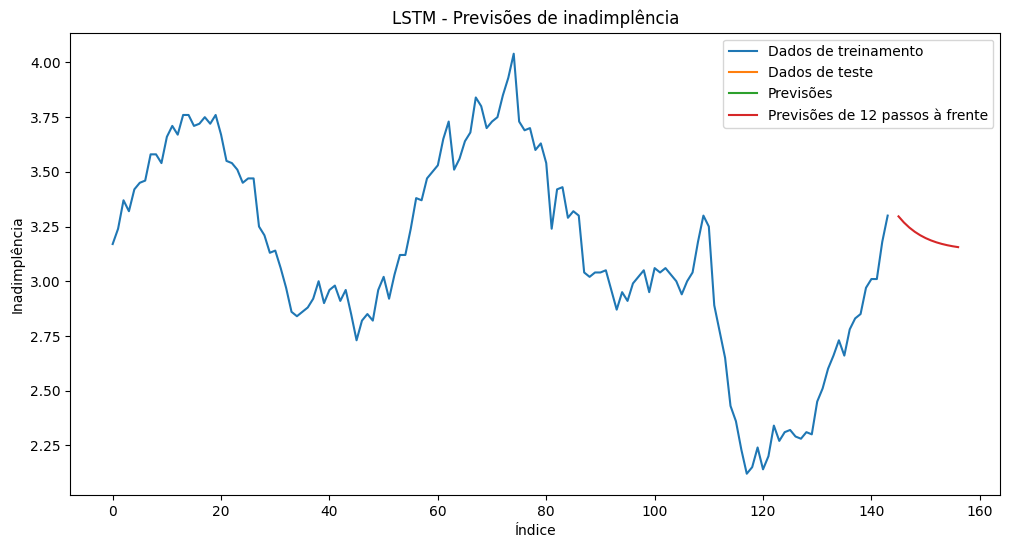

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

data = pd.read_excel('database_bcb.xlsx')
y = data['inadimplencia'].values

train_size = int(len(y) * 0.999)  # 99,9% treinamento
test_size = len(y) - train_size  # 0,01% teste
y_train, y_test = y[:train_size], y[train_size:]

scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

X_train = np.reshape(y_train_scaled[:-1], (y_train_scaled[:-1].shape[0], 1, 1))
X_test = np.reshape(y_test_scaled, (y_test_scaled.shape[0], 1, 1))

model = Sequential()
model.add(LSTM(64, input_shape=(1, 1)))
model.add(Dropout(0.2))  #para regularização
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

#inputs
epochs = 50 
batch_size = 16
model.fit(X_train, y_train_scaled[1:], epochs=epochs, batch_size=batch_size, verbose=1)

y_test_pred_scaled = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

n_passos = 12 # passos
x = np.array([[y_test_scaled[-1]]])

previsoes_mais_passos = []

for _ in range(n_passos):
    previsao_scaled = model.predict(np.reshape(x, (1, 1, 1)))
    previsao = scaler.inverse_transform(previsao_scaled)
    previsoes_mais_passos.append(previsao[0, 0])
    x = np.array([[previsao_scaled]])

previsoes_mais_passos = np.array(previsoes_mais_passos).reshape(-1, 1)

# config grafico
indices_train = range(len(y_train))
indices_test = range(len(y_train), len(y_train) + len(y_test))
indices_pred = range(len(y_train) + len(y_test), len(y_train) + len(y_test) + n_passos)

# plot grafico
plt.figure(figsize=(12, 6))
plt.plot(indices_train, scaler.inverse_transform(y_train_scaled), label="Dados de treinamento")
plt.plot(indices_test, scaler.inverse_transform(y_test_scaled), label="Dados de teste")
plt.plot(indices_test, y_test_pred, label="Previsões")
plt.plot(indices_pred, previsoes_mais_passos, label="Previsões de {} passos à frente".format(n_passos))
plt.title("LSTM - Previsões de inadimplência")
plt.xlabel("Índice")
plt.ylabel("Inadimplência")
plt.legend()
plt.show()